# Class Discussion Data
The code below will build the data set from the handout today and plot the information in various forms. Ultimately we will come to the conclusion that the Hammett parameter, $\sigma$ is really just the $\Delta pK_a$ for the corresponding benzoic acids. The change in the $pL_a$ value in benzoic acid is what is being used as the comparator for all the rest of chemistry. Do you agree?

## Load Data
The code below build the data set directly from the handout. I set up a list of lists and converted it to a dataframe object. Then I can use the dataframe object and manipulate it just like a spreadsheet.

First I will enter the **data from tables 1 \& 2** in the class handout. I will use the $pK_a$ values from table 1 and the corresponding rate data from table 2. I'm just going to enter them directly as a matrix right here in this notebook.

In [1]:
####################################################
### Import Libraries and set up global variables ###
####################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

# github_location_data = "https://github.com/blinkletter/LFER-QSAR/blob/main/data/"
# github_location_styles = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
# github_download = "?raw=True"

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_14/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)



              pKa    rate
Substituent              
p-NO2        3.45  32.900
p-CN         3.56  15.700
p-Cl         4.00   2.100
H            4.20   0.289
p-CH3        4.37   0.172
p-OCH3       4.47   0.143


In [ ]:
def plot_plot(plot_dict)
    
    linfit_flag = True   # change flag to True for linear fit and False for basic scatter plot
    label_flag = True   # change flag to True for linear fit and False for basic scatter plot
    save_pdf_flag = False

    

    github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"

    ##################################################
    ### Setup a figure and choose a stylesheet     ###
    ##################################################

    plot_style_file = "S2_classic2.mplstyle"
    plt.style.use(github_location_styles + plot_style_file)        # Set plot style

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
    ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


    #########################################
    ### Plot the data and the line fit.   ###
    #########################################

    if linfit_flag:     # Change flag to True to plot a linear line fit, False to do a scatter plot
        linfit = linregress(x,y)
        fity = linfit.slope * x + linfit.intercept
        ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
        ax.scatter(x,y, s=64, color="white", zorder=3)
        ax.scatter(x,y, s=16, color="black", zorder=3)
    else:         
    #    ax.plot(x, y, color='black', zorder=1, linewidth=0.7)
        ax.scatter(x,y, s=64, color="white", zorder=3)
        ax.scatter(x,y, s=16, color="black", zorder=3)


    ############################
    ### Set labels and scale ###
    ############################

    ax.set(
    #    title="Initial Rate Log-Log Plot",       
            ylabel=y_label, 
            xlabel=x_label,                
    #          xlim=[-.9,.9],                  
    #          ylim=[-1,7]
            )


    ############################
    ### Print labels on plot ###
    ############################

    if label_flag:      # Change to True to add annotations to the plot 
    names = list(df.index)
    for name,x1,y1 in zip(names,x,y):
        plt.annotate(name,             # this is the text
                    (x1,y1),          # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-20),  # distance from text to points (x,y)
                    ha='left')      # horizontal alignment can be left, right or center


    #############################
    ### Output the final plot ###
    #############################

    if save_pdf_flag:
        fig.savefig("plot.pdf")   # use this to save the figure in PDF format
    
    plt.show()                 # output the combined plot plots


    #####################################
    ### Print the line fit parameters ###
    #####################################

    if linfit_flag:         # Change to True to print a linear line fit results
        print(f"slope = {linfit.slope:0.1f}")
        print(f"intercept = {linfit.intercept:0.3f}")
        print(f"RSQ = {(linfit.rvalue**2):0.3f}")

In [ ]:
######################################
### Set Up Dataframe for Reactions ###
######################################

# substituent, pKa, ester rate hydrolysis (M-1 s-1)

data = [["p-NO2",   3.45,  32.9 ],
        ["p-CN",    3.56,  15.7 ],
        ["p-Cl",    4.00,  2.10 ],
        ["H",       4.20,  0.289],
        ["p-CH3",   4.37,  0.172],
        ["p-OCH3",  4.47,  0.143]]

df = pd.DataFrame(data, columns=["Substituent", "pKa", "rate"])
df = df.set_index("Substituent")

print(df)

## Pick x and y-values

We need x and y-values to plot. The code block below will take the two data series in the data set and assign them to the two axes opf the plot.

In [2]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################


x = -df["pKa"]
y =  df["rate"]

x_label = "$pK_a$"
y_label = "$k_{obs}$ / $M^{-1} min^{-1}$"

## Plot the Data
the code below will plot any x,y pair that is in memory when it is run.  Execute the block above or any of the blocks below to load in different sets of x,y.

use the `if True:` and `if False:` flags below to activate or deactivate given blocks of code.

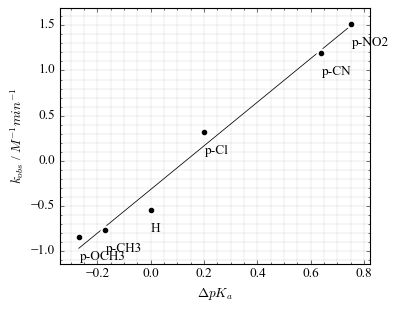

slope = 2.4
intercept = -0.315
RSQ = 0.983


In [14]:
flag = True   # change flag to True for linear fit and False for basic scatter plot


##################################################
### Setup a figure and choose a stylesheet     ###
##################################################

plot_style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + plot_style_file)        # Set plot style

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

if flag:     # Change flag to True to plot a linear line fit, False to do a scatter plot
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
    ax.scatter(x,y, s=64, color="white", zorder=3)
    ax.scatter(x,y, s=16, color="black", zorder=3)
else:         
#    ax.plot(x, y, color='black', zorder=1, linewidth=0.7)
    ax.scatter(x,y, s=64, color="white", zorder=3)
    ax.scatter(x,y, s=16, color="black", zorder=3)


############################
### Set labels and scale ###
############################

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-1,7]
         )


############################
### Print labels on plot ###
############################

if flag:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x1,y1 in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x1,y1),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if flag:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.1f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.3f}")

## Other Data Series
The code in the blocks below adds columns to the dataframe and selects the x,y pairs to highlight various plots. Run one of the blocks below and then run the plotting block above to plot a give x,y data set.

In [9]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

df["Ka"] = 10**(-df["pKa"])
print(df)

x = df["Ka"]
y = df["rate"]

x_label = "$K_a$"
y_label = "$k_{obs}$ / $M^{-1} min^{-1}$"

              pKa    rate        Ka  log rate
Substituent                                  
p-NO2        3.45  32.900  0.000355  1.517196
p-CN         3.56  15.700  0.000275  1.195900
p-Cl         4.00   2.100  0.000100  0.322219
H            4.20   0.289  0.000063 -0.539102
p-CH3        4.37   0.172  0.000043 -0.764472
p-OCH3       4.47   0.143  0.000034 -0.844664


In [11]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

df["log rate"] = np.log10(df["rate"])

print(df)

x = -df["pKa"]
y =  df["log rate"]

x_label = "$pK_a$"
y_label = "$\log{(k_{obs}/ M^{-1} min^{-1})}$"

              pKa    rate        Ka  log rate
Substituent                                  
p-NO2        3.45  32.900  0.000355  1.517196
p-CN         3.56  15.700  0.000275  1.195900
p-Cl         4.00   2.100  0.000100  0.322219
H            4.20   0.289  0.000063 -0.539102
p-CH3        4.37   0.172  0.000043 -0.764472
p-OCH3       4.47   0.143  0.000034 -0.844664


In [13]:
df["diff"]=df["pKa"]["H"]-df["pKa"]

print(df)

x = df["diff"]
y = df["log rate"]

x_label = "$\Delta pK_a$"
y_label = "$k_{obs}$ / $M^{-1} min^{-1}$"

              pKa    rate        Ka  log rate  diff
Substituent                                        
p-NO2        3.45  32.900  0.000355  1.517196  0.75
p-CN         3.56  15.700  0.000275  1.195900  0.64
p-Cl         4.00   2.100  0.000100  0.322219  0.20
H            4.20   0.289  0.000063 -0.539102  0.00
p-CH3        4.37   0.172  0.000043 -0.764472 -0.17
p-OCH3       4.47   0.143  0.000034 -0.844664 -0.27


## Load and process Hammett parameters
the code below loads the Hammett data from `LFER_HanschLeoTaft.csv` and processes it to remove the fields that we do not need (it is a large data set). I stores the data frame as `df2`.

You will need to execute this code BEFORE you execute the call to rhe `df2` dataframe in the block above. I placed this code at the bottom to keep it from cluttering the line or discussion above but you must load in the hammett data into `df2` before you can call upon it.

In [ ]:

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

filename = "LFER_HanschLeoTaft.csv"
#filename = "LFER_Williams.csv"

hdf = pd.read_csv(github_location_data + filename + github_download, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Fill across sigma values and select substituents ###
########################################################
hdf=fill_sigma(hdf)

rowlist = ["m-Br", "p-Br", "m-CH3", "p-CH3", 
           "m-Cl", "p-Cl", "p-CN", "m-COCH3", 
           "p-COCH3", "m-F", "p-F", "H",
           "m-NO2",  "p-NO2", "m-OCH3", "p-OCH3"]
df2 = hdf.loc[rowlist]

### Remove unneeded columns

df2.drop(labels = ["TABLE V", "TABLE I"],
        axis = 1,
        inplace = True)
#print(df2)
df2.sort_values(by=['sigma'], inplace=True)
print(df2)

## Add in Hammett $\sigma$ Values from the Data Table
include published $\sigma$ values for substituents. Plot $\log{rate}$ vs. $\sigma$. You will need to execute the block at the bottom of this notebook BEFORE using this code.

In [ ]:
s = "sigma"
#s = "s_plus"
#s = "s_minus"

df["sigma"] = df2[s]
print(df)

x = df["sigma"]
y = df["log rate"]

x_label = "$pK_a$"
y_label = "$\sigma$"
#y_label = "$\sigma^+$"
#y_label = "$\sigma^-$"